#Block analysis

Alternative view: We split our data sequence into non-overlapping blocks.
And we compare the variance of the total sequence with the average variance of inside the blocks.

If the blocks are too small the variance inside the blocks is smaller than the total sequence. The data inside the blocks is correltated.
As soon as the two variances are becoming equal, we know that there is no additional correlation inside a block: the length of the blocks approximates the correlation length.

In [19]:
import numpy as np
def get_block_variance(data, block_length):
  block_variances = []
  count = block_length
  while count < len(data):
    block_variances.append(data[count-block_length:count].var())
    count += block_length
  return np.mean(block_variances)

Let's try it out. We generate a 1D random walk and use that as our data.

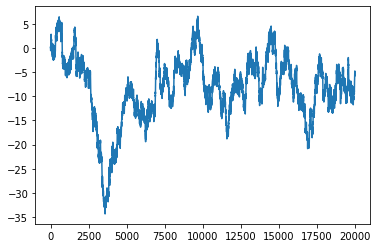

In [20]:
import matplotlib.pyplot as plt
length = 20000
rng = np.random.default_rng(432)
steps = rng.uniform(-0.5, 0.5, length)
path = np.cumsum(steps)

plt.plot(path)

Now we calculate the variances for different block lengths.

In [21]:
block_lengths = []
variances = []
block_length = int(length/1.2)
while block_length > 2:
  block_lengths.append(block_length)
  variances.append(get_block_variance(path, int(block_length)))
  block_length /=1.2
block_lengths = np.asarray(block_lengths)
variances = np.asarray(variances)

And we can look at the evolution of the block variance as a function of block_length.

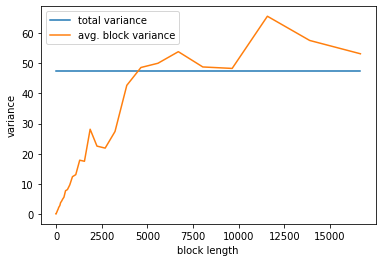

In [22]:
fig,ax = plt.subplots()
ax.set_xlabel("block length")
ax.set_ylabel("variance")

ax.plot(block_lengths, block_lengths*0+np.var(path), label="total variance")
ax.plot(block_lengths, variances, label="avg. block variance")

ax.legend(loc="best")

So in this example (seed specific) we reach decorrelation time at after about 5000 steps. After that, the variances are about equal but fluctuating.